Data source is [here](https://www.kaggle.com/datasets/saadharoon27/airlines-dataset)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os


## Connect to database

In [4]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("/content/travel.sqlite")
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,aircrafts_data,aircrafts_data,2,CREATE TABLE aircrafts_data (\r\n aircraft_...
1,table,airports_data,airports_data,3,CREATE TABLE airports_data (\r\n airport_co...
2,table,boarding_passes,boarding_passes,4,CREATE TABLE boarding_passes (\r\n ticket_n...
3,table,bookings,bookings,5,CREATE TABLE bookings (\r\n book_ref charac...
4,table,flights,flights,6,CREATE TABLE flights (\r\n flight_id intege...
5,table,seats,seats,7,CREATE TABLE seats (\r\n aircraft_code char...
6,table,ticket_flights,ticket_flights,8,CREATE TABLE ticket_flights (\r\n ticket_no...
7,table,tickets,tickets,9,CREATE TABLE tickets (\r\n ticket_no charac...


### Table of aircrafts

In [5]:
table_aircrafts = pd.read_sql("""SELECT *
                                 FROM aircrafts_data;""", conn)
table_aircrafts

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


The data represents an array in 2 languages: English(en) and Russian(ru). We will leave data only in English.

In [6]:
table_aircrafts['model'] = table_aircrafts['model'].apply(lambda x: json.loads(x)['en'])
table_aircrafts

,aircraft_code,model,range
0,773,Boeing 777-300,11100
1,763,Boeing 767-300,7900
2,SU9,Sukhoi Superjet-100,3000
3,320,Airbus A320-200,5700
4,321,Airbus A321-200,5600
5,319,Airbus A319-100,6700
6,733,Boeing 737-300,4200
7,CN1,Cessna 208 Caravan,1200
8,CR2,Bombardier CRJ-200,2700


### Table of airports

In [7]:
table_airports = pd.read_sql("""SELECT *
                                FROM airports_data;""", conn)
table_airports

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [8]:
table_airports['airport_name'] = table_airports['airport_name'].apply(lambda x: json.loads(x)['en'])
table_airports['city'] = table_airports['city'].apply(lambda x: json.loads(x)['en'])
table_airports

,airport_code,airport_name,city,coordinates,timezone
0,YKS,Yakutsk Airport,Yakutsk,"(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,Mirny Airport,Mirnyj,"(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,Khabarovsk-Novy Airport,Khabarovsk,"(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,Yelizovo Airport,Petropavlovsk,"(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,Yuzhno-Sakhalinsk Airport,Yuzhno-Sakhalinsk,"(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,Murmansk Airport,Murmansk,"(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,Abakan Airport,Abakan,"(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,Barnaul Airport,Barnaul,"(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,Anapa Vityazevo Airport,Anapa,"(37.3473014831539984,45.002101898192997)",Europe/Moscow


### Table of bookings

In [9]:
table_bookings = pd.read_sql("""SELECT *
                                FROM bookings;""", conn)
table_bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


### Table of flights

In [10]:
table_flights = pd.read_sql("""SELECT *
                                FROM flights;""", conn)
table_flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


### Table of seats

In [11]:
table_seats = pd.read_sql("""SELECT *
                             FROM seats;""", conn)
table_seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


### Table of ticket_flights

In [12]:
table_ticket_flights = pd.read_sql("""SELECT *
                                      FROM ticket_flights;""", conn)
table_ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


### Table of tickets

In [13]:
table_tickets = pd.read_sql("""SELECT *
                               FROM tickets;""", conn)
table_tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


## EDA

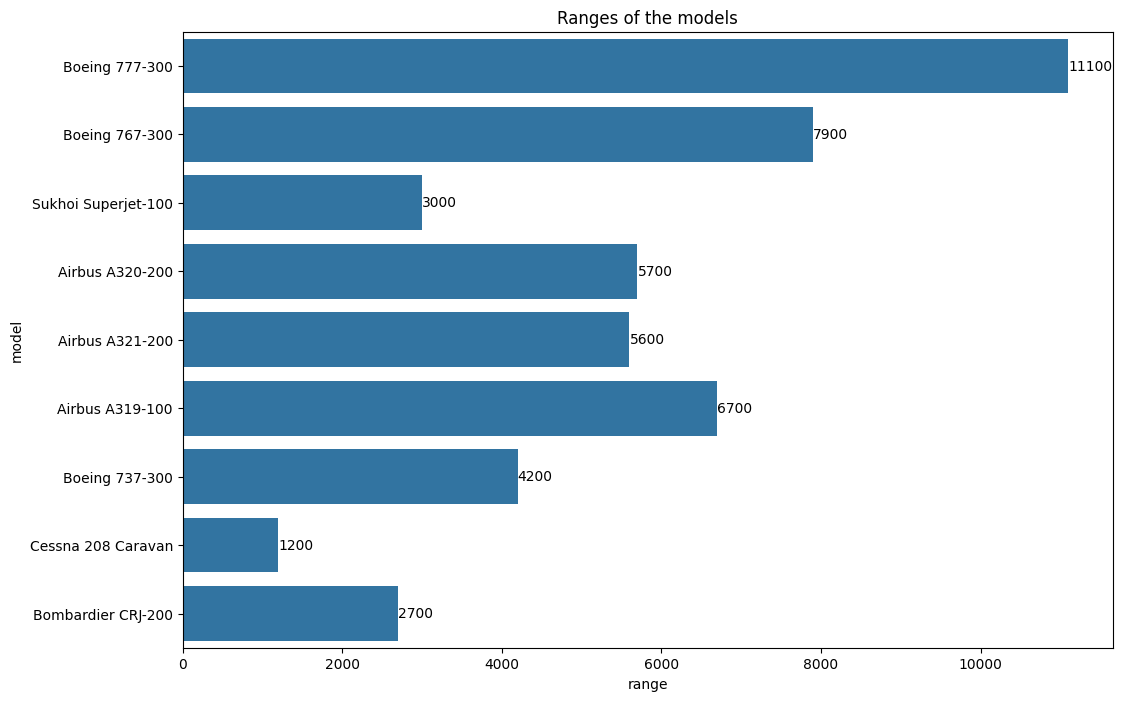

In [14]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='range',y='model', data=table_aircrafts)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Ranges of the models')
plt.show()

In [15]:
table_ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [16]:
data_classes = pd.read_sql_query("""SELECT fare_conditions as class, count(*) as count
                        FROM  ticket_flights
                        GROUP BY fare_conditions""", conn)

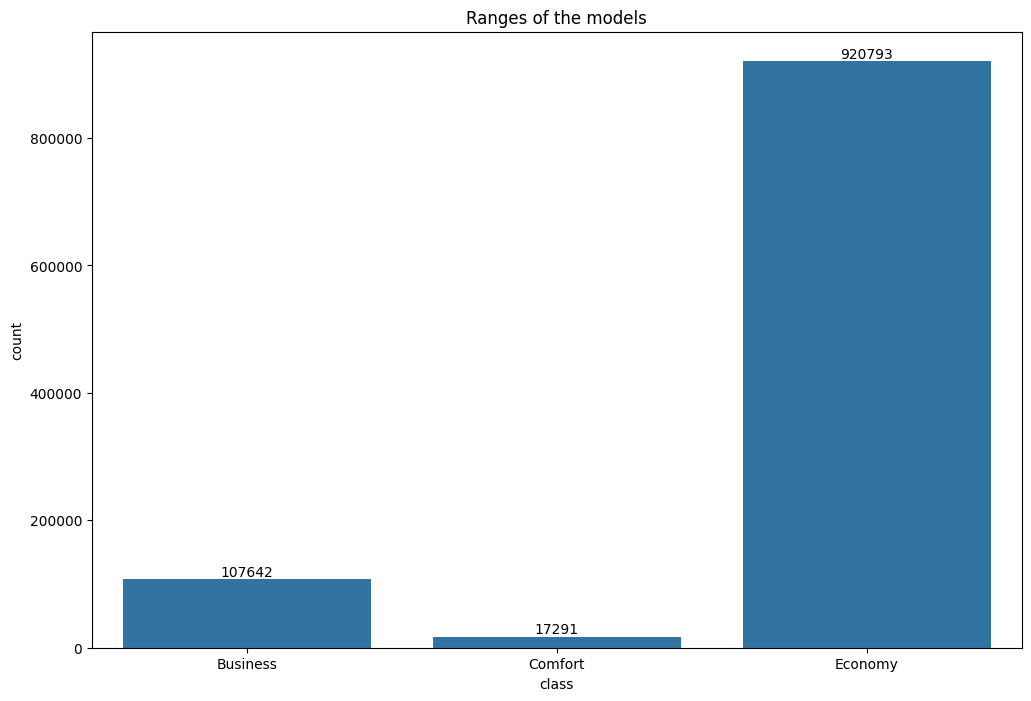

In [17]:
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='class',y='count', data=data_classes)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Ranges of the models')
plt.show()

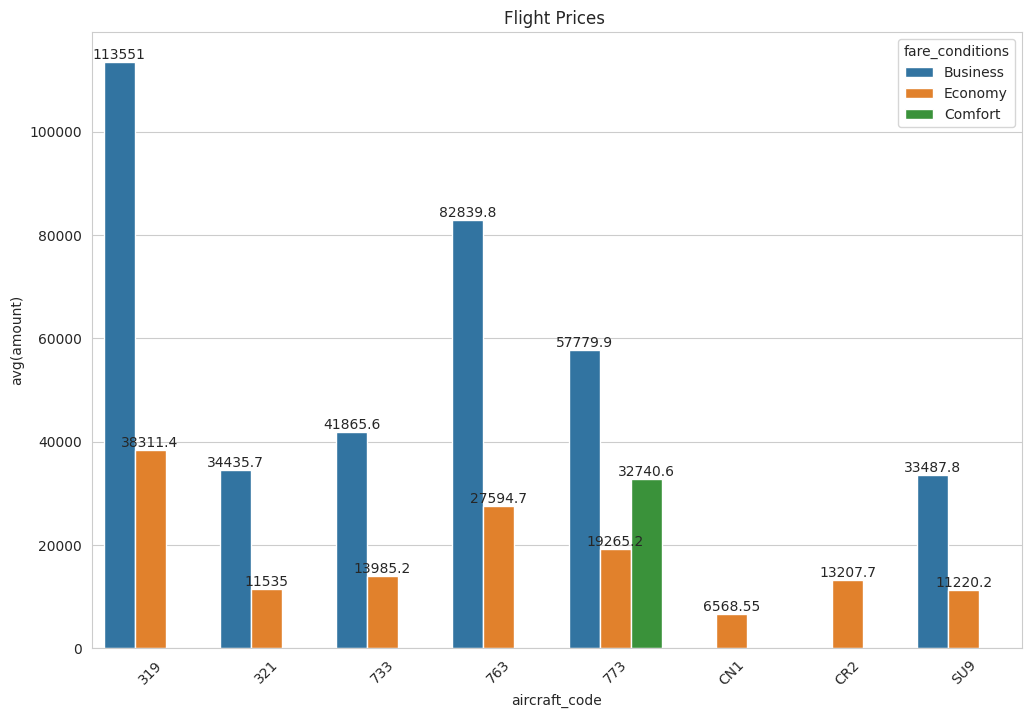

In [18]:
data_code_classes = pd.read_sql_query("""SELECT fare_conditions, aircraft_code,avg(amount)
                        FROM  ticket_flights JOIN flights
                        ON  ticket_flights.flight_id = flights.flight_id
                        GROUP BY  aircraft_code, fare_conditions""", conn)

sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='avg(amount)',hue='fare_conditions', data=data_code_classes)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Flight Prices ')
plt.xticks(rotation=45)
plt.show()

In [19]:
data_code_classes

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


## Exploring Occupancy Rate

In [20]:
revenue = pd.read_sql_query(
"""SELECT  aircraft_code, COUNT(*) as total_tickets_per_plane, SUM(amount) as total_revenue_per_plane
   FROM ticket_flights JOIN flights ON ticket_flights.flight_id = flights.flight_id
   GROUP BY aircraft_code
   ORDER BY total_tickets_per_plane desc, total_revenue_per_plane desc """, conn)
revenue

,aircraft_code,total_tickets_per_plane,total_revenue_per_plane
0,SU9,365698,5114484700
1,CR2,150122,1982760500
2,773,144376,3431205500
3,763,124774,4371277100
4,321,107129,1638164100
5,733,86102,1426552100
6,319,52853,2706163100
7,CN1,14672,96373800


## Calculating the average occupancy per aircraft

In [21]:
occupancy_rate_new = pd.read_sql_query(
    """WITH
       seats_per_aircraft AS (select aircraft_code,count(*) as num_seats from seats
                    group by aircraft_code),

       seats_occupied AS (select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id)


    SELECT seats_occupied.aircraft_code,avg(seats_occupied.seats_count) as booked_seats, seats_per_aircraft.num_seats, avg(seats_occupied.seats_count)/seats_per_aircraft.num_seats as occupancy_rate
    FROM seats_occupied JOIN  seats_per_aircraft
                    ON seats_occupied.aircraft_code = seats_per_aircraft.aircraft_code
                    GROUP BY seats_occupied.aircraft_code""", conn)
occupancy_rate_new

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692
